# Midterm 1

![](./imgs/umaine.png)

You are given the map of UMaine as an image that contains only the following colors:
1. Green for grass
2. Purple/Red for buildings
3. Gray for parking lots and assigned roads and pathways
4. White for everything else.

As a take home midterm you have to find (a) the shortest distance path (b) the shortest time path from Collins art center (`start=[559, 1226]`) to the Lord Hall(`goal=[895, 203]`).

Assume the following:

1. The robot moves with half the speed in the grass.
2. The robot cannot move through purple/red buildings area
3. Gray and white areas are equivalent
4. Each pixel in the image is 1/3rd of a meter in distance. The robot moves at 10m/sec

#### Getting the image
The following code gets the image for you

In [44]:
FILELOCATION = "umaine.png"
import urllib
with urllib.request.urlopen("https://raw.githubusercontent.com/wecacuee/gazebo_osm/1e7f7a5bfed1e9a1bd60848bbf15d16fc4b1ccbf/testFiles/umaine.png") as uf:
    with open("umaine.png", "wb") as wf:
        wf.write(uf.read())
        

In [45]:
!pip install ipympl matplotlib numpy

#### Exploring the image
The following code allows you to explore the image

Textarea(value='You have not clicked on the figure yet', description='Color:  ', disabled=True, placeholder='Y…

15

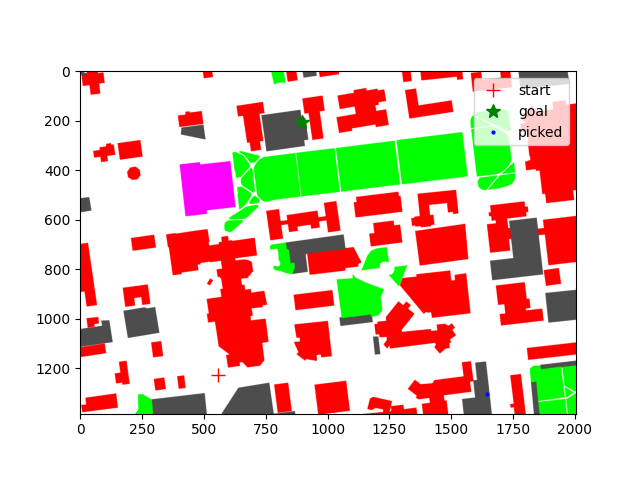

In [46]:
# Click anywere on the image to find the color of that point
import ipywidgets as widgets # Make the print statement interactive
import matplotlib.pyplot as plt
import numpy as np
# Make the matplotlib figure interactive
%matplotlib widget
start = np.array([559, 1226], dtype=int)
goal = np.array([895, 203], dtype=int)
img = plt.imread('umaine.png')
random_pt = np.random.randint(2, (img.shape[1], img.shape[0]))
# Let's plot this point
def plot_map(ax, img, goal, start):
    ax.imshow(img) # Plot the image again
    ax.plot(start[0], start[1], 'r+', markersize=10, label='start') 
    ax.plot(goal[0], goal[1], 'g*', markersize=10, label='goal')
    ax.legend()
    return ax
# Draw the map
fig, ax = plt.subplots()
plot_map(ax, img, goal, start)
picked_pt, = ax.plot(random_pt[0], random_pt[1], 'bo', markersize=2, label='picked')
ax.legend()

# Create a textarea to display the interactive message
txtwidget = widgets.Textarea(
    value='You have not clicked on the figure yet',
    placeholder='You have not clicked on the figure yet',
    description='Color:  ',
    disabled=True,
    width=200
)
display(txtwidget)

# This function will be called whenever you click anywhere on the map
def onclick(event):
    x, y = event.xdata, event.ydata
    picked_pt.set_xdata([x])
    picked_pt.set_ydata([y])
    # Change the display message in the figure
    txtwidget.value = "(%d, %d): %.1f %.1f %.1f %.1f" % tuple((int(x), int(y), *img[int(y), int(x), :]))
    
fig.canvas.mpl_connect('button_release_event', onclick)


### Categorizing the image by color

The following code categorizes the image into 

np.True_

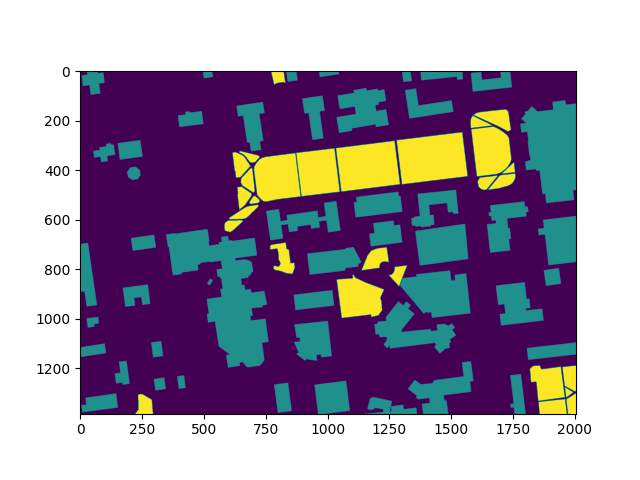

In [47]:
BUILDING_CODE=1
BUILDING_COLOR=[1, 0, 0, 1]

GRASS_COLOR=[0, 1, 0, 1]
GRASS_CODE=2

OTHER_CODE=0
def color_to_category_img(img):
    """Converts the color image into category image"""
    return np.where(np.all(np.abs(img - BUILDING_COLOR) < 0.05, axis=2),
             BUILDING_CODE,
             np.where(
                 np.all(np.abs(img - GRASS_COLOR) < 0.05, axis=2),
                 GRASS_CODE,
                 OTHER_CODE))
category_img = color_to_category_img(img)
fig, ax = plt.subplots()
ax.imshow(category_img)

def find_point_category(category_img, pt):
    """Find the category of the point"""
    return category_img[pt[1], pt[0]]

find_point_category(category_img, [959, 413]) == GRASS_CODE

In [48]:
find_point_category(category_img, [627, 1070]) == BUILDING_CODE

np.True_

In [49]:
find_point_category(category_img, [583, 108]) == OTHER_CODE

np.True_